In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
from tops.config import instantiate
import pathlib
from ssd.utils import load_config
from plot_utils import plot

In [3]:
task23_iteration1_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration1/"))
task23_iteration2_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration2/"))

list_of_logs = [task23_iteration1_logs, task23_iteration2_logs]
labels = ["Task 2.3 iteration 1", "Task 2.3 iteration 2"]

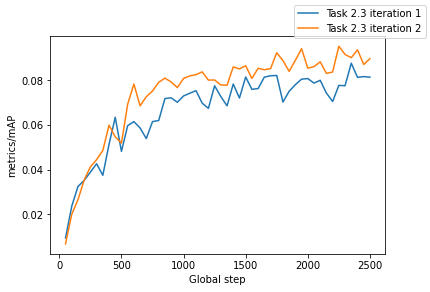

In [4]:
# plot mAP@0.5:0.95
fig, ax = plot(list_of_logs, labels, "metrics/mAP")
fig.legend()

In [6]:
print("Highest mAP@0.5:0.95 reach for Task 2.3 iteration2: ", max([entry["metrics/mAP"] for entry in task23_iteration2_logs if "metrics/mAP" in entry]))

Highest mAP@0.5:0.95 reach for Task 2.3 iteration2:  0.09526051413202218


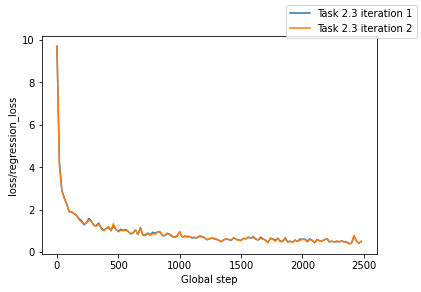

In [7]:
# plot regression loss
fig, ax = plot(list_of_logs, labels, "loss/regression_loss")
fig.legend()

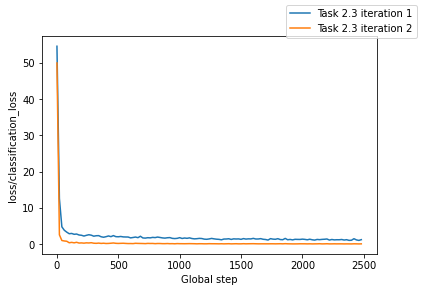

In [8]:
# plot classification loss
fig, ax = plot(list_of_logs, labels, "loss/classification_loss")
fig.legend()

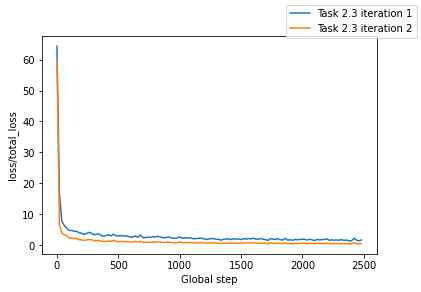

In [9]:
# plot total loss
fig, ax = plot(list_of_logs, labels, "loss/total_loss")
fig.legend()

In [10]:
cfg = load_config("../configs/task23_iteration2.py")
model = instantiate(cfg.model)

num_parameters = sum(p.numel() for p in model.parameters())
num_trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total number of parameters: ", num_parameters)
print("Total number of trainable parameters: ", num_trainable_parameters)

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/adtan
Saving all SSD outputs to: /work/snotra/adtan/ssd_outputs
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json
Total number of parameters:  56446792
Total number of trainable parameters:  56185032


In [11]:
%cd ../configs

/home/adtan/project/assignment4/SSD/configs


In [13]:
!python ../runtime_analysis.py task23_iteration2.py

2022-05-07 18:17:03,136 [INFO ] Loaded checkpoint from /work/snotra/adtan/ssd_outputs/task23_iteration1/checkpoints/2500.ckpt
/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Checking runtime for image shape: [128, 1024]
Runtime for image shape: [128, 1024]
Total runtime: 21.984198570251465
FPS: 4.548721650254643
NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/adtan
Saving all SSD outputs to: /work/snotra/adtan/ssd_outputs
Found dataset directory in: /work/dat